<a href="https://colab.research.google.com/github/cjharsh/Colab-Files-with-ML/blob/master/GLA_LAB_PCA_Imaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

In [0]:
# Load data
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)

In [0]:
_, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names
 
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
# Compute a PCA 
n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
 
# apply PCA transformation
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [0]:
# train a neural network
print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True).fit(X_train_pca, y_train)

Fitting the classifier to the training set
Iteration 1, loss = 1.56484005
Validation score: 0.525000
Iteration 2, loss = 1.13412135
Validation score: 0.550000
Iteration 3, loss = 0.90259238
Validation score: 0.587500
Iteration 4, loss = 0.71628247
Validation score: 0.675000
Iteration 5, loss = 0.55826611
Validation score: 0.712500
Iteration 6, loss = 0.44116038
Validation score: 0.787500
Iteration 7, loss = 0.35584437
Validation score: 0.812500
Iteration 8, loss = 0.29240010
Validation score: 0.812500
Iteration 9, loss = 0.24295268
Validation score: 0.837500
Iteration 10, loss = 0.20236331
Validation score: 0.850000
Iteration 11, loss = 0.16967297
Validation score: 0.850000
Iteration 12, loss = 0.14388243
Validation score: 0.850000
Iteration 13, loss = 0.12249130
Validation score: 0.850000
Iteration 14, loss = 0.10523634
Validation score: 0.850000
Iteration 15, loss = 0.09094923
Validation score: 0.850000
Iteration 16, loss = 0.07949449
Validation score: 0.837500
Iteration 17, loss = 0

                   precision    recall  f1-score   support

     Colin Powell       0.88      0.83      0.85        60
  Donald Rumsfeld       0.78      0.62      0.69        29
    George W Bush       0.84      0.98      0.91       166
Gerhard Schroeder       0.86      0.68      0.76        47
       Tony Blair       0.76      0.62      0.68        40

        micro avg       0.84      0.84      0.84       342
        macro avg       0.83      0.75      0.78       342
     weighted avg       0.84      0.84      0.83       342



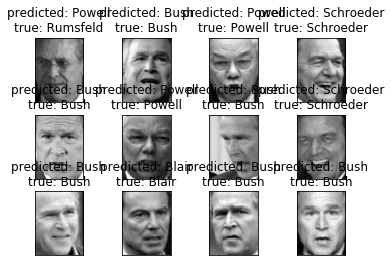

In [0]:

y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))
# Visualization
def plot_gallery(images, titles, h, w, rows=3, cols=4):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
 
def titles(y_pred, y_test, target_names):
    for i in range(y_pred.shape[0]):
        pred_name = target_names[y_pred[i]].split(' ')[-1]
        true_name = target_names[y_test[i]].split(' ')[-1]
        yield 'predicted: {0}\ntrue: {1}'.format(pred_name, true_name)
 
prediction_titles = list(titles(y_pred, y_test, target_names))
plot_gallery(X_test, prediction_titles, h, w)